In [2]:
import numpy as np
import pandas as pd

In [3]:
data_train = pd.read_csv('data_train.csv')
data_train.head()

,patient_id,patient_nhd,patient_ds,rec_date_time,patient_manual_class,abs,std,norm_abs,mean,sd,median,mode,Q25,Q75,IQR,skew,kurt,kx2,n_pic
0,9,7,2010 лев рука ср/3 (1 фистула) псевдоаневриз...,2020-10-24 07:48:07+00:00,1,4081.864006,5408.359232,0.140010,88.008607,110.421159,71.619048,76.174603,47.825397,97.333333,49.507937,6.192113,48.103969,5958.0,15.0
1,9,7,2010 лев рука ср/3 (1 фистула) псевдоаневриз...,2020-10-24 07:49:33+00:00,1,3719.568824,4887.531205,0.126883,99.071097,101.088521,81.317460,71.793651,53.111111,115.936508,62.825397,5.538590,39.026997,6500.0,14.0
2,12,48,2020 лев рука нижняя/3 (1 фистула) большо...,2020-10-24 08:05:51+00:00,1,427.946990,650.850026,0.078221,129.536269,210.251583,86.016129,84.725806,55.193548,117.919355,62.725806,5.551192,38.843619,16.0,20.0
3,14,17,2012 пр рука ниж/3 (2 фистула) аневризма,2020-10-24 13:00:17+00:00,1,1016.499673,1423.356818,0.103820,102.385570,155.382733,72.290323,23.548387,41.032258,114.258065,73.225806,5.653364,41.409069,1260.0,18.0
4,18,3,2015/2016 реконструкция лев рука ср/3 (1 фис...,2020-10-24 13:11:55+00:00,1,1450.002705,1883.707885,0.146140,148.698770,157.701471,106.428571,95.904762,75.365079,164.809524,89.444444,5.435196,39.540098,2279.0,10.0


In [4]:
data_test = pd.read_csv('data_test.csv')
data_test.head()

,patient_id,patient_nhd,patient_ds,rec_date_time,patient_manual_class,abs,std,norm_abs,mean,sd,median,mode,Q25,Q75,IQR,skew,kurt,kx2,n_pic
0,1,1.0,тест,2020-10-24 02:42:08+00:00,NaN,4138.972396,5445.041312,0.139750,121.059432,132.735023,93.967742,72.209677,62.790323,135.483871,72.693548,5.279617,35.316137,7257.0,12.0
1,2,NaN,NaN,2020-10-24 02:50:58+00:00,NaN,1526.677837,2586.943519,0.085180,131.110929,149.193446,94.806452,87.903226,68.548387,129.080645,60.532258,6.084524,47.850833,3502.0,17.0
2,3,2.0,NaN,2020-10-24 02:51:03+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3.0,NaN,2020-10-24 07:34:26+00:00,NaN,2144.847757,2810.485024,0.140241,87.980181,129.886494,65.793651,41.000000,43.761905,93.444444,49.682540,6.279688,49.033671,3755.0,16.0
4,5,4.0,NaN,2020-10-24 07:35:19+00:00,NaN,596.217557,798.365461,0.131994,129.606324,203.627790,83.774194,62.000000,59.000000,115.854839,56.854839,6.137953,47.466975,154.0,13.0


In [5]:
df = pd.DataFrame(data_train)
df = df.drop('patient_id', axis = 1)
df = df.drop('patient_nhd', axis = 1)
df = df.drop('patient_ds', axis = 1)
df = df.drop('rec_date_time', axis = 1)
df = df.drop('patient_manual_class', axis = 1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler().fit_transform(df)
df_train = pd.DataFrame(data=scaler_train)
df_train = df_train.dropna()
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.063667,0.092864,-0.325035,-0.338507,-0.711116,0.095765,1.342042,0.476646,-0.340986,-0.668397,-0.154371,-0.231308,0.176492,0.552474
1,-0.082233,-0.074814,-0.546598,-0.026525,-0.917122,0.451590,1.199858,0.794425,0.077442,-0.282862,-0.431256,-0.330037,0.339997,0.426486
2,-1.407805,-1.438792,-1.367891,0.832646,1.492510,0.623980,1.619571,0.919622,0.122041,-0.285745,-0.425917,-0.332031,-1.616029,1.182413
3,-1.170789,-1.190087,-0.935845,0.066949,0.281352,0.120393,-0.365940,0.068241,0.039690,0.018225,-0.382628,-0.304127,-1.240752,0.930437
4,-0.996212,-1.041880,-0.221580,1.373062,0.332535,1.372893,1.982383,2.132340,1.176710,0.487747,-0.475062,-0.324456,-0.933351,-0.077465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.847582,0.819105,0.844522,0.501444,0.237929,0.718070,-0.648089,-0.441812,0.887868,1.355507,-0.544691,-0.309480,1.674282,-1.211356
292,0.563408,0.540939,0.589899,0.161658,-1.028785,1.242960,-1.066863,0.276722,0.721715,0.795661,-0.851656,-0.443614,1.489962,-1.085368
293,-1.129998,-0.990501,-2.112323,1.825677,3.312892,-1.150113,-1.053776,-1.636461,1.420065,2.615747,2.751920,2.206025,-1.203345,0.552474
294,-0.679871,-0.674765,-1.058884,-1.013522,0.481501,-1.659025,-1.052206,-1.997182,-1.339959,-0.762946,4.849839,4.601516,-1.057035,0.804449


In [7]:
df_test = pd.DataFrame(data_test)
df_test = df_test.drop('patient_id', axis = 1)
df_test = df_test.drop('patient_nhd', axis = 1)
df_test = df_test.drop('patient_ds', axis = 1)
df_test = df_test.drop('rec_date_time', axis = 1)
df_test = df_test.drop('patient_manual_class', axis = 1)

In [8]:
scaler_test = StandardScaler().fit_transform(df_test)
df_test = pd.DataFrame(data=scaler_test)
df_test = df_test.dropna()
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.544445,0.561565,0.171151,0.076397,-0.555035,0.403777,0.976920,0.972730,0.056189,-0.225806,-0.586747,-0.306331,1.091350,-0.021170
1,-0.485169,-0.335961,-0.638651,0.257795,-0.297573,0.423671,1.417559,1.255746,-0.024677,-0.404805,-0.256412,-0.216535,-0.051490,0.707326
3,-0.241522,-0.265763,0.178441,-0.520582,-0.599595,-0.264520,0.100624,0.037459,-0.474724,-0.564500,-0.176316,-0.208061,0.025511,0.561626
4,-0.851902,-0.897627,0.056058,0.230642,0.553953,0.161983,0.690256,0.786431,-0.191705,-0.458932,-0.234485,-0.219285,-1.070459,0.124529
5,-0.484194,-0.498553,-0.084267,-0.418641,-0.344771,-0.173028,0.889474,0.266832,-0.481540,-0.641131,-0.084967,-0.188483,-0.288884,0.561626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.478467,0.475358,0.800339,-1.003603,-0.851476,-0.941009,-0.350883,-1.027409,-0.790968,-0.614192,0.398692,-0.020771,0.370950,-0.312568
231,0.074909,0.446493,-0.309616,-0.600371,-1.033095,-0.242027,-0.988519,-0.271114,-0.345493,-0.321478,-0.513298,-0.285088,0.968088,-0.021170
232,0.065144,0.453552,-0.484836,-0.451530,-0.934731,-0.147425,0.260177,-0.170848,-0.267449,-0.260545,-0.596810,-0.309252,1.068828,-0.021170
233,0.188053,0.215218,0.255797,-0.781511,-0.671987,-0.535087,-0.989877,-0.713475,-0.551222,-0.428783,0.048824,-0.017248,0.591605,0.707326


In [9]:
X_train, y_train = df_train.iloc[:,:3], df_train.iloc[:,3]

In [10]:
X_test, y_test = df_test.iloc[:,:3], df_test.iloc[:,3]

In [11]:
from sklearn import preprocessing
from sklearn import utils
#преобразуем в категориальные признаки:
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)
#print(y_train_transformed)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
#print(X_train_transformed)

In [13]:
X_test_transformed = scaler.fit_transform(X_test)
y_test_transformed = lab.fit_transform(y_test)

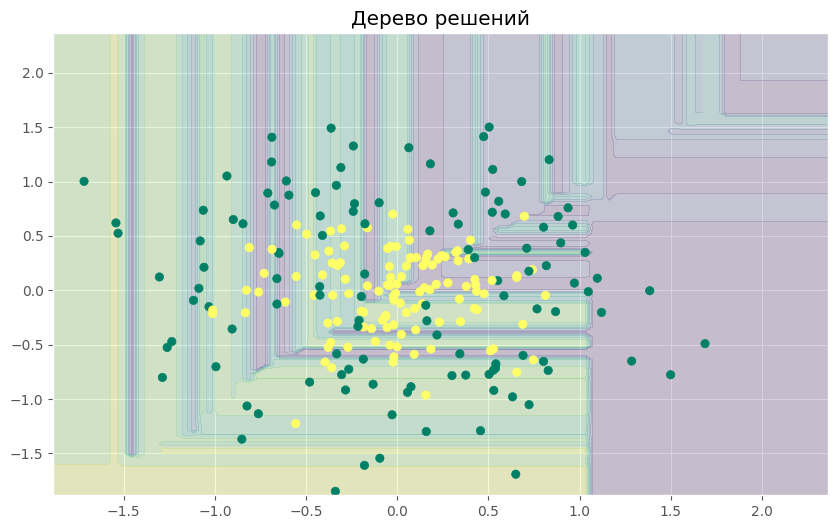

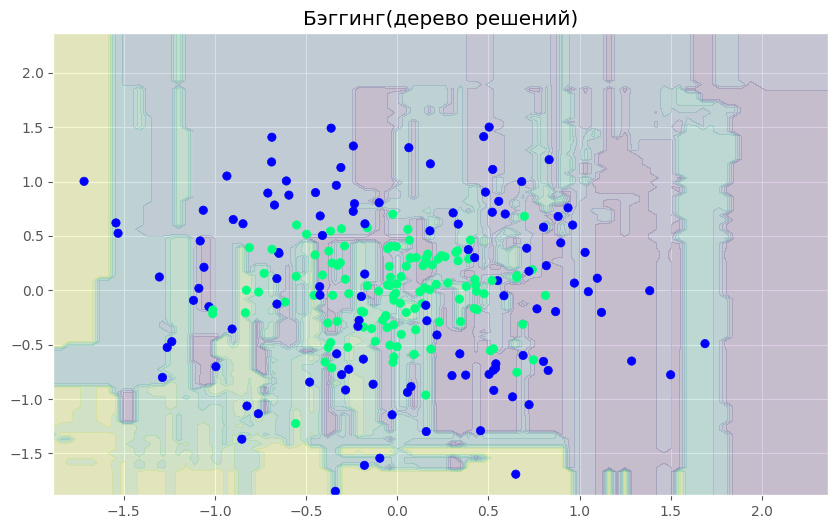

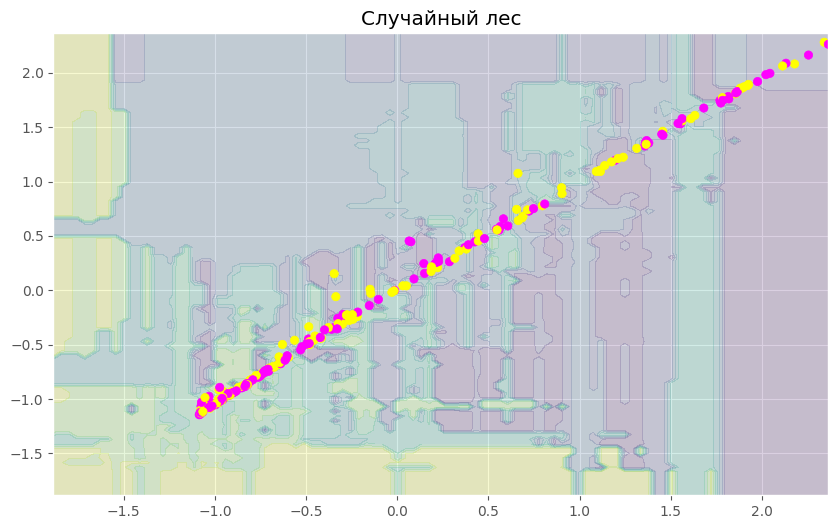

In [15]:
#Код для сравнения решающего дерева, бэггинга и случайного леса для задачи классификации
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline

np.random.seed(42)
X, y = make_circles(n_samples=234, factor=0.1, noise=0.35, random_state=42)

model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train_transformed, y_train_transformed)

x_range = np.linspace(X_test_transformed.min(), X_test_transformed.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = model_DT.predict(np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.title("Дерево решений")
plt.show()

model_BG_DT = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, random_state=42)
model_BG_DT.fit(X_train_transformed, y_train_transformed)

x_range = np.linspace(X_test_transformed.min(), X_test_transformed.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = model_BG_DT.predict(np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()])#, xx2.ravel(), xx1.ravel(), xx2.ravel(), xx1.ravel(), xx2.ravel(), xx1.ravel(), xx2.ravel(), xx1.ravel(), xx2.ravel(), xx1.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.title("Бэггинг(дерево решений)")
plt.show()

model_RF = RandomForestClassifier(n_estimators=300, random_state=42)
model_RF.fit(X_train_transformed, y_train_transformed)

x_range = np.linspace(X_test_transformed.min(), X_test_transformed.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = model_RF.predict(np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()])#, xx2.ravel(), xx1.ravel(), xx2.ravel(), xx1.ravel(), xx2.ravel(), xx1.ravel(), xx2.ravel(), xx1.ravel(), xx2.ravel(), xx1.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X_test_transformed[:,0], X_test_transformed[:,1], c=y, cmap='spring')
plt.title("Случайный лес")
plt.show()

На рисунках выше видно, что границы случайного леса отличаются от границ бэггинга и дерева решений, такой график говорит о переобучении и слабой обобщающей способности. В то время как у бэггинга и случайного леса границы достаточно сглаженны, и практически нет признаков переобучения

In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
# Инициализируем классификатор (случайный лес) с дефолтными параметрами
model_RF = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)
# Обучаем на тренировочном датасете
results = cross_val_score(model_RF, X_train_transformed, y_train_transformed, cv=skf)
# Оцениваем долю верных ответов
print("Точность модели случайного леса: {:.2f}%".format(results.mean()*100))

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Точность модели случайного леса: 0.68%


In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
# Инициализируем классификатор (случайный лес) с дефолтными параметрами
model_BG_DT = BaggingClassifier(DecisionTreeClassifier(), random_state=42)
# Обучаем на тренировочном датасете
results = cross_val_score(model_RF, X_train_transformed, y_train_transformed, cv=skf)
# Оцениваем долю верных ответов
print("Точность модели бэггинга на деревьях решений: {:.2f}%".format(results.mean()*100))

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Точность модели бэггинга на деревьях решений: 0.68%


In [36]:
#пытаемся улучшить долю правильных ответов, находим оптимальное кол-во деревьев в модели случайного леса
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    model_RF = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X_train_transformed, y_train_transformed):
        model_RF.fit(X_train_transformed, y_train_transformed)
        temp_train_acc.append(model_RF.score(X_train_transformed, y_train_transformed))
        temp_test_acc.append(model_RF.score(X_test_transformed, y_test_transformed))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Наибольшая точность модели случайного леса определяется на {:.2f}% with {} деревьях".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Chernya

Наибольшая точность модели случайного леса определяется на 0.43% with 20 деревьях


In [45]:
#пытаемся улучшить долю правильных ответов, находим оптимальное кол-во деревьев в модели бэггинга деревьев решений
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    model_BG_DT = BaggingClassifier(DecisionTreeClassifier(),n_estimators=ntrees, random_state=42)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X_train_transformed, y_train_transformed):
        model_BG_DT.fit(X_train_transformed, y_train_transformed)
        temp_train_acc.append(model_BG_DT.score(X_train_transformed, y_train_transformed))
        temp_test_acc.append(model_BG_DT.score(X_test_transformed, y_test_transformed))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Наибольшая точность модели бэггинга на дереве решений определяется на {:.2f}% with {} деревьях".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Pyth

Наибольшая точность модели бэггинга на дереве решений определяется на 0.85% with 5 деревьях


Text(0.5, 0, 'Кол-во деревьев')

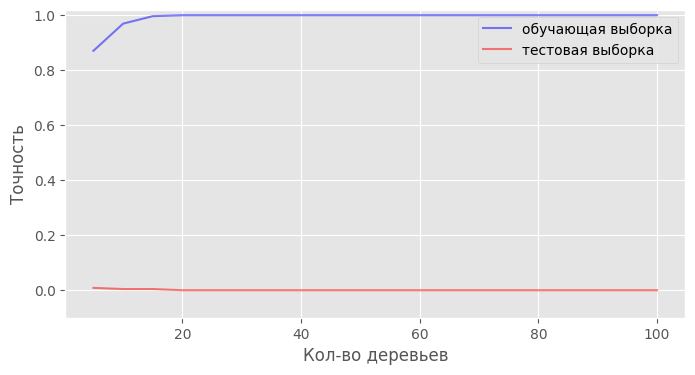

In [48]:
#работаем с моделью бэггинга
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='обучающая выборка')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='тестовая выборка')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([-0.1,1.02])
ax.set_ylabel("Точность")
ax.set_xlabel("Кол-во деревьев")

In [55]:
model_BG_DT = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5, random_state=42)
model_BG_DT.fit(X_train_transformed, y_train_transformed)
print("Точность модели бэггинга на пяти деревьях на обучающей выборке:")
display(model_BG_DT.score(X_train_transformed, y_train_transformed)) 

Точность модели бэггинга на пяти деревьях на обучающей выборке:


0.8707482993197279

In [56]:
model_BG_DT = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5, random_state=42)
model_BG_DT.fit(X_test_transformed, y_test_transformed)
print("Точность модели бэггинга на пяти деревьях на тестовой выборке:")
display(model_BG_DT.score(X_test_transformed, y_test_transformed)) 

Точность модели бэггинга на пяти деревьях на тестовой выборке:


0.8888888888888888